# Two-Dimensional Moment Frame Analysis

This is a complete example of frame analysis. 
Although it is a 2D case, it can be applied to more complex 3D models. 
While it demonstrates linear elastic analysis, it is also applicable to nonlinear elastoplastic analysis.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import openseespy.opensees as ops

import opstool as opst
import opstool.vis.pyvista as opsvis

## Create the model

![](frame_demo.png)

Create the OpenSees model

In [2]:
def FEModel():
    ops.wipe()
    ops.model("basic", "-ndm", 2, "-ndf", 3)

    # %% Defining Nodes

    ops.node(1, 0.000000e00, 0.000000e00)
    ops.node(2, 3.600000e02, 0.000000e00)
    ops.node(3, 7.200000e02, 0.000000e00)
    ops.node(4, 0.000000e00, 1.620000e02)
    ops.node(5, 3.600000e02, 1.620000e02)
    ops.node(6, 7.200000e02, 1.620000e02)
    ops.node(7, 0.000000e00, 3.240000e02)
    ops.node(8, 3.600000e02, 3.240000e02)
    ops.node(9, 7.200000e02, 3.240000e02)
    ops.node(10, 0.000000e00, 4.800000e02)
    ops.node(11, 3.600000e02, 4.800000e02)
    ops.node(12, 7.200000e02, 4.800000e02)
    ops.node(13, 0.000000e00, 6.360000e02)
    ops.node(14, 3.600000e02, 6.360000e02)
    ops.node(15, 7.200000e02, 6.360000e02)
    ops.node(16, 0.000000e00, 7.920000e02)
    ops.node(17, 3.600000e02, 7.920000e02)
    ops.node(18, 7.200000e02, 7.920000e02)
    ops.node(19, 0.000000e00, 9.480000e02)
    ops.node(20, 3.600000e02, 9.480000e02)
    ops.node(21, 7.200000e02, 9.480000e02)
    ops.node(22, 0.000000e00, 1.104000e03)
    ops.node(23, 3.600000e02, 1.104000e03)
    ops.node(24, 7.200000e02, 1.104000e03)

    # %% write node restraint

    ops.fix(1, 1, 1, 1)
    ops.fix(2, 1, 1, 1)
    ops.fix(3, 1, 1, 1)

    # %% Define the rigidDiaphragm
    ops.rigidDiaphragm(1, 5, 4, 6)
    ops.rigidDiaphragm(1, 8, 7, 9)
    ops.rigidDiaphragm(1, 11, 10, 12)
    ops.rigidDiaphragm(1, 14, 13, 15)
    ops.rigidDiaphragm(1, 17, 16, 18)
    ops.rigidDiaphragm(1, 20, 19, 21)
    ops.rigidDiaphragm(1, 23, 22, 24)

    # %% Defining Frame Elements

    ops.geomTransf("Linear", 1)
    ops.element("elasticBeamColumn", 1, 1, 4, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 2, 4, 7, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 3, 7, 10, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 4, 10, 13, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 5, 13, 16, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 6, 16, 19, 5.170000e01, 2.950000e04, 2.150000e03, 1)
    ops.element("elasticBeamColumn", 7, 19, 22, 5.170000e01, 2.950000e04, 2.150000e03, 1)
    ops.element("elasticBeamColumn", 8, 2, 5, 8.440000e01, 2.950000e04, 3.910000e03, 1)
    ops.element("elasticBeamColumn", 9, 5, 8, 8.440000e01, 2.950000e04, 3.910000e03, 1)
    ops.element("elasticBeamColumn", 10, 8, 11, 8.440000e01, 2.950000e04, 3.910000e03, 1)
    ops.element("elasticBeamColumn", 11, 11, 14, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 12, 14, 17, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 13, 17, 20, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 14, 20, 23, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 15, 3, 6, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 16, 6, 9, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 17, 9, 12, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 18, 12, 15, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 19, 15, 18, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 20, 18, 21, 5.170000e01, 2.950000e04, 2.150000e03, 1)
    ops.element("elasticBeamColumn", 21, 21, 24, 5.170000e01, 2.950000e04, 2.150000e03, 1)
    ops.element("elasticBeamColumn", 22, 4, 5, 4.710000e01, 2.950000e04, 5.120000e03, 1)
    ops.element("elasticBeamColumn", 23, 7, 8, 4.710000e01, 2.950000e04, 5.120000e03, 1)
    ops.element("elasticBeamColumn", 24, 10, 11, 3.830000e01, 2.950000e04, 4.020000e03, 1)
    ops.element("elasticBeamColumn", 25, 13, 14, 3.830000e01, 2.950000e04, 4.020000e03, 1)
    ops.element("elasticBeamColumn", 26, 16, 17, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 27, 19, 20, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 28, 22, 23, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 29, 5, 6, 4.710000e01, 2.950000e04, 5.120000e03, 1)
    ops.element("elasticBeamColumn", 30, 8, 9, 4.710000e01, 2.950000e04, 5.120000e03, 1)
    ops.element("elasticBeamColumn", 31, 11, 12, 3.830000e01, 2.950000e04, 4.020000e03, 1)
    ops.element("elasticBeamColumn", 32, 14, 15, 3.830000e01, 2.950000e04, 4.020000e03, 1)
    ops.element("elasticBeamColumn", 33, 17, 18, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 34, 20, 21, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 35, 23, 24, 3.250000e01, 2.950000e04, 3.330000e03, 1)

    # %% Define the mass
    ops.mass(5, 0.49, 0.0, 0.0)
    ops.mass(8, 0.49, 0.0, 0.0)
    ops.mass(11, 0.49, 0.0, 0.0)
    ops.mass(14, 0.49, 0.0, 0.0)
    ops.mass(17, 0.49, 0.0, 0.0)
    ops.mass(20, 0.49, 0.0, 0.0)
    ops.mass(23, 0.49, 0.0, 0.0)

Let's first visualize the geometry by ``Pyvista``:

In [3]:
FEModel()

In [4]:
opsvis.set_plot_props(line_width=4, point_size=2)
plotter = opsvis.plot_model(show_ele_numbering=True, show_node_numbering=True)
# plotter.show()  # For interactive plot

In [5]:
plotter.off_screen = True  # for screenshot, you should set this to True for interactive use
_ = plotter.screenshot("images/model_pyvista.png")
plotter.close()

![images/model_pyvista.png](images/model_pyvista.png)

You can also use the following code to visualize the model by using ``Plotly``:

In [6]:
opst.vis.plotly.set_plot_props(line_width=4, point_size=2)
fig = opst.vis.plotly.plot_model()
fig.write_html("model.html")
fig.show()

## Eigenvalue analysis

solver="-fullGenLapack" is intended to extract all seventh-order modes. This solver should be avoided in actual large models.

In [7]:
opst.post.save_eigen_data(odb_tag="eigen", mode_tag=6, solver="-fullGenLapack")

WARNING - the 'fullGenLapack' eigen solver is VERY SLOW. Consider using the default eigen solver.Using DomainModalProperties - Developed by: Massimo Petracca, Guido Camata, ASDEA Software Technology


OPSTOOL ::  Eigen data has been saved to .opstool.output/EigenData-eigen.nc!

odb_tag = "eigen" is used to indentify the output database for eigenvalue analysis.

In [8]:
opsvis.set_plot_props(cmap="jet", line_width=4, point_size=5, font_size=12)
plotter = opsvis.plot_eigen(mode_tags=[1, 6], odb_tag="eigen", subplots=True, bc_scale=3)
# plotter.show() # for auto

OPSTOOL ::  Loading eigen data from .opstool.output/EigenData-eigen.nc ...

In [9]:
plotter.off_screen = True  # for screenshot, you should set this to True for interactive use
_ = plotter.screenshot("images/eigen_pyvista.png")
plotter.close()

![images/eigen_pyvista.png](images/eigen_pyvista.png)

We can also retrieve the data of eigenvalue analysis:

In [10]:
model_props, eigen_vectors = opst.post.get_eigen_data(odb_tag="eigen")
model_props_df = model_props.to_pandas()  # to pandas DataFrame
print(model_props_df.columns)

OPSTOOL ::  Loading eigen data from .opstool.output/EigenData-eigen.nc ...

Index(['eigenLambda', 'eigenOmega', 'eigenFrequency', 'eigenPeriod',
       'partiFactorMX', 'partiFactorMY', 'partiFactorRMZ', 'partiMassMX',
       'partiMassMY', 'partiMassRMZ', 'partiMassesCumuMX', 'partiMassesCumuMY',
       'partiMassesCumuRMZ', 'partiMassRatiosMX', 'partiMassRatiosMY',
       'partiMassRatiosRMZ', 'partiMassRatiosCumuMX', 'partiMassRatiosCumuMY',
       'partiMassRatiosCumuRMZ'],
      dtype='object', name='Properties')


In [11]:
print("Modal period: ", model_props_df["eigenPeriod"])
print("-" * 50)
print("Participation mass ratio: ", model_props_df["partiMassRatiosMX"])
print("-" * 50)
print("Cumulative participation mass ratio: ", model_props_df["partiMassRatiosCumuMX"])

Modal period:  modeTags
1    1.273211
2    0.431278
3    0.242043
4    0.160179
5    0.118990
6    0.095064
Name: eigenPeriod, dtype: float64
--------------------------------------------------
Participation mass ratio:  modeTags
1    79.962669
2    11.336182
3     4.180994
4     2.115029
5     1.414555
6     0.679967
Name: partiMassRatiosMX, dtype: float64
--------------------------------------------------
Cumulative participation mass ratio:  modeTags
1    79.962669
2    91.298850
3    95.479845
4    97.594874
5    99.009429
6    99.689396
Name: partiMassRatiosCumuMX, dtype: float64


## Static analysis

Defining Lateral Distributed Loads:

In [12]:
FEModel()
# %% Define the load pattern
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
ops.load(4, 2.5, 0.0, 0.0)
ops.load(7, 5.0, 0.0, 0.0)
ops.load(10, 7.5, 0.0, 0.0)
ops.load(13, 10.0, 0.0, 0.0)
ops.load(16, 12.5, 0.0, 0.0)
ops.load(19, 15.0, 0.0, 0.0)
ops.load(22, 20.0, 0.0, 0.0)

Re-examine the model:

In [13]:
opsvis.set_plot_props(line_width=4, point_size=4, font_size=12)
fig = opsvis.plot_model(show_nodal_loads=True, load_scale=2, bc_scale=3)
# fig.show()  # fig.show() for practical use

In [14]:
fig.off_screen = True  # for screenshot, you should set this to True for interactive use
_ = fig.screenshot("images/model_pyvista2.png")
fig.close()

![images/model_pyvista2.png](images/model_pyvista2.png)

To perform the analysis:

In [15]:
n_steps = 10
ops.system("BandGeneral")
ops.constraints("Transformation")
ops.numberer("RCM")
ops.test("NormDispIncr", 1.0e-12, 10, 3)
ops.algorithm("Linear")
ops.integrator("LoadControl", 1 / n_steps)
ops.analysis("Static")

Save data:

In [16]:
odb = opst.post.CreateODB(odb_tag="static")
for _ in range(n_steps):
    ops.analyze(1)  # one step of analysis
    odb.fetch_response_step()  # fetch the response on the current step
odb.save_response()

OPSTOOL ::  All responses data with _odb_tag = static saved in .opstool.output/RespStepData-static.nc!

Retrieve the nodal displacements:

In [17]:
node_resp = opst.post.get_nodal_responses(odb_tag="static")
print(
    "Node 22 displacement in x direction: ",
    node_resp["disp"].sel(nodeTags=22, DOFs="UX").data[-1],
)

OPSTOOL ::  Loading all response data from .opstool.output/RespStepData-static.nc ...

Node 22 displacement in x direction:  1.450757


Retrieve element response:

In [18]:
ele_resp = opst.post.get_element_responses(odb_tag="static", ele_type="Frame")
print(ele_resp.data_vars)

OPSTOOL ::  Loading Frame response data from .opstool.output/RespStepData-static.nc ...

Data variables:
    localForces          (time, eleTags, localDofs) float32 18kB -0.0 ... -527.7
    basicForces          (time, eleTags, basicDofs) float32 9kB 0.0 -0.0 ... 0.0
    basicDeformations    (time, eleTags, basicDofs) float32 9kB 0.0 -0.0 ... 0.0
    plasticDeformation   (time, eleTags, basicDofs) float32 9kB 0.0 -0.0 ... 0.0
    sectionForces        (time, eleTags, secPoints, secDofs) float32 65kB -0....
    sectionDeformations  (time, eleTags, secPoints, secDofs) float32 65kB 0.0...
    sectionLocs          (time, eleTags, secPoints, locs) float32 32kB 0.0 .....


In [19]:
ele_forces = ele_resp["sectionForces"]
print("M:", ele_forces.sel(eleTags=1, secDofs="MZ", secPoints=1).data)
print("V:", ele_forces.sel(eleTags=1, secDofs="VY", secPoints=1).data)
print("N:", ele_forces.sel(eleTags=1, secDofs="N", secPoints=1).data)

M: [  -0.       232.46773  464.93546  697.4032   929.8709  1162.3386
 1394.8064  1627.274   1859.7418  2092.2095  2324.6772 ]
V: [ -0.         -2.067208   -4.134416   -6.2016244  -8.268832  -10.3360405
 -12.403249  -14.470457  -16.537664  -18.604874  -20.672081 ]
N: [-0.         6.9986734 13.997347  20.99602   27.994694  34.993366
 41.99204   48.990715  55.989388  62.98806   69.98673  ]


Visualize node responses:

In [20]:
on_notebook = True  # In practical use, you can set it to False
jupyter_backend = "static"  # In practical use, you can set it to None

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-static.nc ...

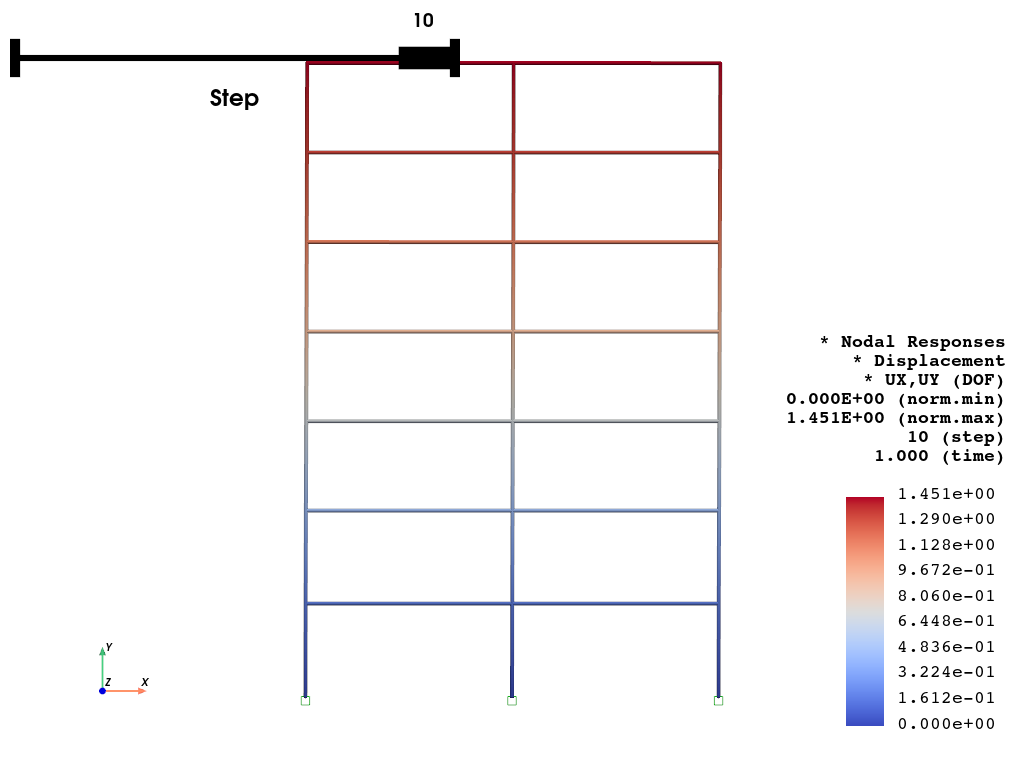

In [21]:
opsvis.set_plot_props(cmap="coolwarm", notebook=on_notebook, line_width=4, title_font_size=10)
plotter = opsvis.plot_nodal_responses(
    odb_tag="static", resp_type="disp", resp_dof=["UX", "UY"], slides=True, defo_scale=2.0
)
plotter.show(jupyter_backend=jupyter_backend)

Visualizing Element Response:

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-static.nc ...

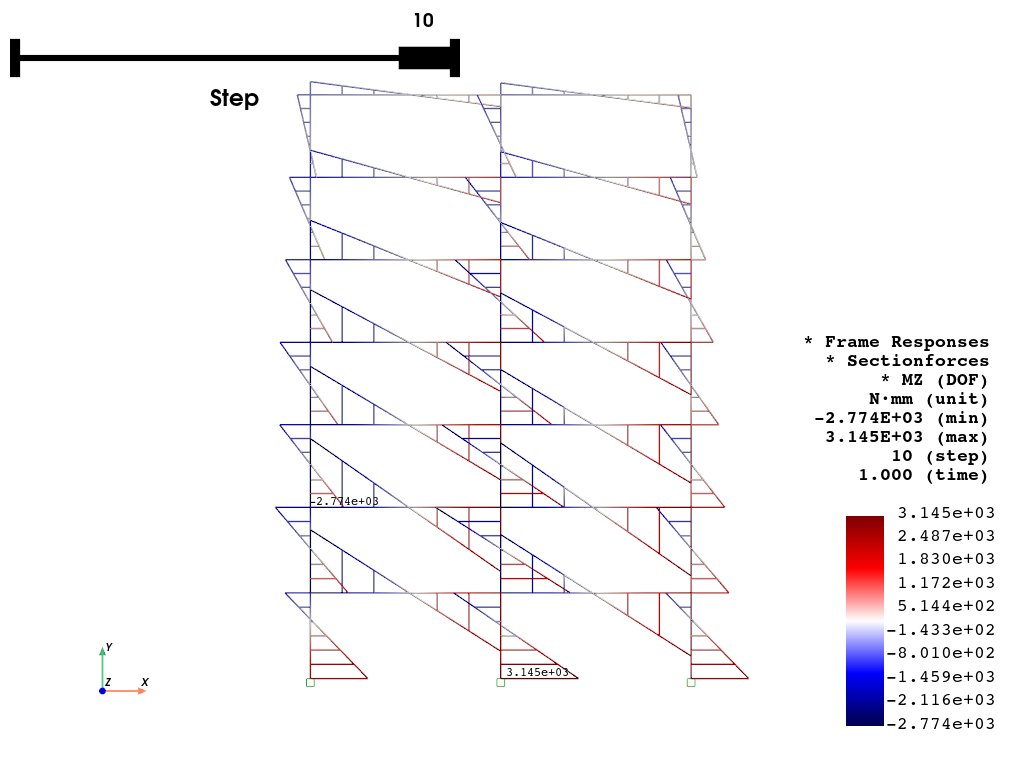

In [22]:
# Moment response
opsvis.set_plot_props(cmap="seismic", line_width=1, title_font_size=14)

opsvis.plot_frame_responses(
    odb_tag="static",
    resp_type="sectionForces",
    resp_dof="Mz",
    unit_symbol="N·mm",
    unit_factor=1.0,
    slides=True,
    scale=-2.0,
    style="wireframe",
).show(jupyter_backend=jupyter_backend)

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-static.nc ...

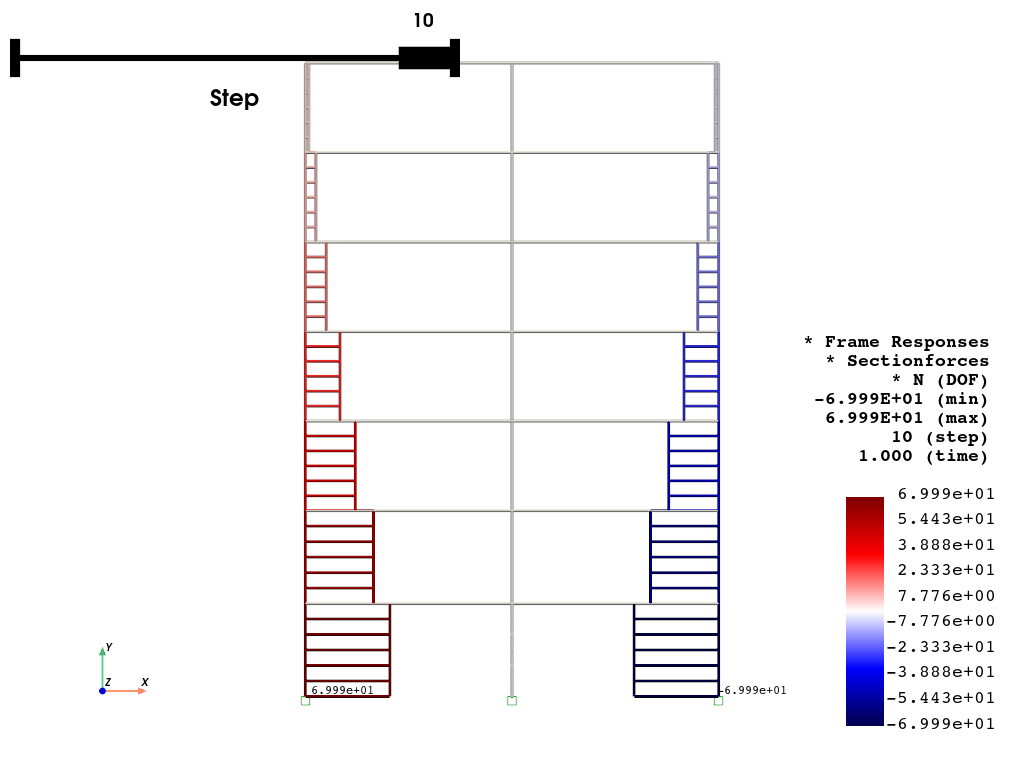

In [23]:
# Axial response
opsvis.plot_frame_responses(
    odb_tag="static",
    resp_type="sectionForces",
    resp_dof="N",
    slides=True,
    scale=-2.0,
    line_width=3,
    style="wireframe",
).show(jupyter_backend=jupyter_backend)

## Seismic response analysis

### Load the ground motion data

All files can be downloaded here:
[click](https://github.com/yexiang1992/opstool/tree/master/docs/examples/post/Frame2D)

1560


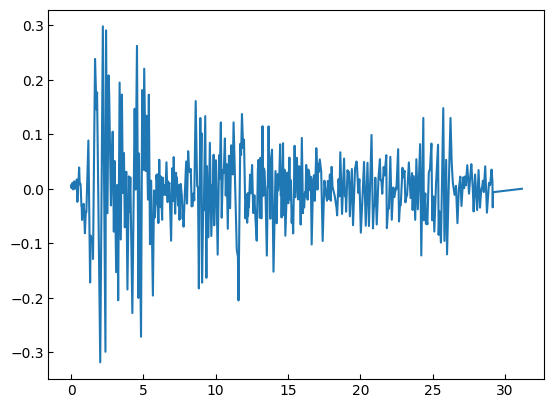

In [24]:
gmdata = np.loadtxt("ELCENTRO.txt")
time = gmdata[:, 0]
accel = gmdata[:, 1]


print(len(time))
plt.plot(time, accel)
plt.show()

### Create the ground motion load pattern

In [25]:
FEModel()
ops.timeSeries("Path", 2, "-time", *time, "-values", *accel, "-factor", 386.4)
ops.pattern("UniformExcitation", 2, 1, "-accel", 2)

### Create the Rayleigh damping

In [26]:
xDamp = 0.05
MpropSwitch = 1.0
KcurrSwitch = 0.0
KcommSwitch = 1.0
KinitSwitch = 0.0
nEigenI = 1  # mode 1
nEigenJ = 2  # mode 2
lambdaN = ops.eigen(nEigenJ)  # eigenvalue analysis for nEigenJ modes
lambdaI = lambdaN[nEigenI - 1]  # eigenvalue mode i
lambdaJ = lambdaN[nEigenJ - 1]  # eigenvalue mode j
omegaI = np.sqrt(lambdaI)
omegaJ = np.sqrt(lambdaJ)
# M-prop. damping; D = alphaM*M
alphaM = MpropSwitch * xDamp * (2 * omegaI * omegaJ) / (omegaI + omegaJ)
# current-K;      +beatKcurr*KCurrent
betaKcurr = KcurrSwitch * 2.0 * xDamp / (omegaI + omegaJ)
# last-committed K;   +betaKcomm*KlastCommitt
betaKcomm = KcommSwitch * 2.0 * xDamp / (omegaI + omegaJ)
betaKinit = KinitSwitch * 2.0 * xDamp / (omegaI + omegaJ)
ops.rayleigh(alphaM, 0.0, 0.0, betaKcomm)

### Perform analysis and save data

In [27]:
ops.wipeAnalysis()
ops.system("BandGeneral")
ops.constraints("Transformation")
ops.numberer("RCM")
ops.test("NormDispIncr", 1.0e-12, 10, 3)
ops.algorithm("Linear")
ops.integrator("HHT", 1.0, 0.5, 0.25)
ops.analysis("Transient")

In [28]:
n_steps, dt = 1600, 0.02
odb = opst.post.CreateODB(odb_tag="seismic")
for _ in range(n_steps):
    ops.analyze(1, dt)
    odb.fetch_response_step()
odb.save_response(zlib=True)
# zlib=True to compress the data

OPSTOOL ::  All responses data with _odb_tag = seismic saved in .opstool.output/RespStepData-seismic.nc!

### Retrieve Node Responses

In [29]:
node_resp = opst.post.get_nodal_responses(odb_tag="seismic")
node_disp22 = node_resp["disp"].sel(nodeTags=22, DOFs="UX")
node_vel22 = node_resp["vel"].sel(nodeTags=22, DOFs="UX")
node_accel22 = node_resp["accel"].sel(nodeTags=22, DOFs="UX")

OPSTOOL ::  Loading all response data from .opstool.output/RespStepData-seismic.nc ...

Draw a time series plot:

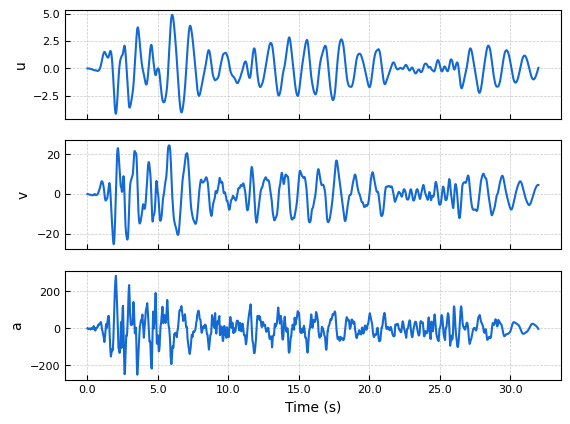

In [30]:
fig, axes = plt.subplots(3, 1, sharex=True)
time = node_disp22.time

# Define colors and line styles
colors = ["#136ad5", "#fb8a2e"]  # Use neutral colors for publication standards
line_styles = ["-", "--"]  # Solid and dashed lines for differentiation

# Plot data with clear labels
axes[0].plot(time, node_disp22.data, color=colors[0], linestyle=line_styles[0], linewidth=1.5)

axes[1].plot(time, node_vel22.data, color=colors[0], linestyle=line_styles[0], linewidth=1.5)

axes[2].plot(time, node_accel22.data, color=colors[0], linestyle=line_styles[0], linewidth=1.5)

# Set axis labels and title font sizes
axes[0].set_ylabel("u", fontsize=10)
axes[1].set_ylabel("v", fontsize=10)
axes[2].set_ylabel("a", fontsize=10)
axes[2].set_xlabel("Time (s)", fontsize=10)

# Customize each subplot
for ax in axes:
    ax.tick_params(axis="both", which="major", labelsize=8)  # Set tick font size
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # Add light grid lines
    # ax.legend(fontsize=9, loc="best", frameon=False)  # Simple legend without box

# Format X-axis ticks to have consistent significant figures
for ax in axes:
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.2)  # Adjust vertical spacing
# Save figure in a publication-friendly format
# plt.savefig("fig-node22resp.pdf", bbox_inches="tight")
plt.show()

In [31]:
print("OpenSees Node 22 Disp Max:", node_disp22.data.max())
print("OpenSees Node 22 Vel Max:", node_vel22.data.max())
print("OpenSees Node 22 Accel Max:", node_accel22.data.max())
print("-" * 50)
print("OpenSees Node 22 Disp Min:", node_disp22.data.min())
print("OpenSees Node 22 Vel Min:", node_vel22.data.min())
print("OpenSees Node 22 Accel Min:", node_accel22.data.min())

OpenSees Node 22 Disp Max: 4.886218
OpenSees Node 22 Vel Max: 24.562452
OpenSees Node 22 Accel Max: 284.1298
--------------------------------------------------
OpenSees Node 22 Disp Min: -4.141897
OpenSees Node 22 Vel Min: -25.271881
OpenSees Node 22 Accel Min: -249.5041


### Retrieve Element Responses

In [32]:
ele_resp = opst.post.get_element_responses(odb_tag="seismic", ele_type="Frame", resp_type="sectionForces")
frame1Mz = -ele_resp.sel(eleTags=1, secDofs="MZ", secPoints=1)
frame1N = ele_resp.sel(eleTags=1, secDofs="N", secPoints=1)
frame1Vy = ele_resp.sel(eleTags=1, secDofs="VY", secPoints=1)

OPSTOOL ::  Loading Frame sectionForces response data from .opstool.output/RespStepData-seismic.nc ...

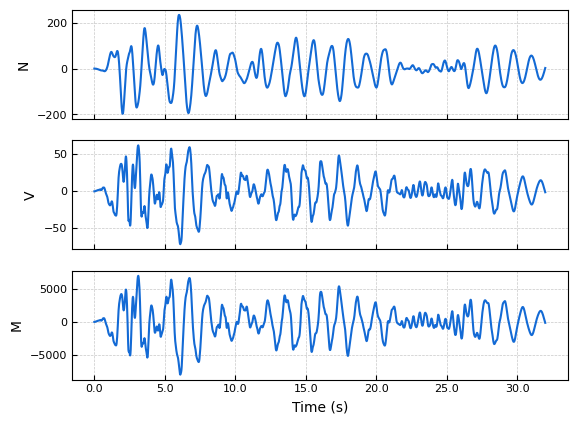

In [33]:
fig, axes = plt.subplots(3, 1, sharex=True)
time = frame1Mz.time

# Define colors and line styles
colors = ["#136ad5", "#fb8a2e"]  # Use neutral colors for publication standards
line_styles = ["-", "--"]  # Solid and dashed lines for differentiation

# Plot data with clear labels
axes[0].plot(time, frame1N.data, color=colors[0], linestyle=line_styles[0], linewidth=1.5)

axes[1].plot(time, frame1Vy.data, color=colors[0], linestyle=line_styles[0], linewidth=1.5)

axes[2].plot(time, frame1Mz.data, color=colors[0], linestyle=line_styles[0], linewidth=1.5)

# Set axis labels and title font sizes
axes[0].set_ylabel("N", fontsize=10)
axes[1].set_ylabel("V", fontsize=10)
axes[2].set_ylabel("M", fontsize=10)
axes[2].set_xlabel("Time (s)", fontsize=10)

# Customize each subplot
for ax in axes:
    ax.tick_params(axis="both", which="major", labelsize=8)  # Set tick font size
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # Add light grid lines
    # ax.legend(fontsize=9, loc="best", frameon=False)  # Simple legend without box

# Format X-axis ticks to have consistent significant figures
for ax in axes:
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.2)  # Adjust vertical spacing
# Save figure in a publication-friendly format
# plt.savefig("fig-frame1-forces.pdf", bbox_inches="tight")
plt.show()

In [34]:
print("OpenSees Frame 1 N Max:", frame1N.data.max())
print("OpenSees Frame 1 Vy Max:", frame1Vy.data.max())
print("OpenSees Frame 1 Mz Max:", frame1Mz.data.max())
print("-" * 50)
print("OpenSees Frame 1 N Min:", frame1N.data.min())
print("OpenSees Frame 1 Vy Min:", frame1Vy.data.min())
print("OpenSees Frame 1 Mz Min:", frame1Mz.data.min())

OpenSees Frame 1 N Max: 233.99113
OpenSees Frame 1 Vy Max: 61.886253
OpenSees Frame 1 Mz Max: 6995.9204
--------------------------------------------------
OpenSees Frame 1 N Min: -196.78415
OpenSees Frame 1 Vy Min: -71.202286
OpenSees Frame 1 Mz Min: -8003.0625


### Creating an .MP4 animation

In [35]:
opsvis.set_plot_props(font_size=8, title_font_size=10, line_width=5, point_size=3, cmap=["blue"])
plotter = opsvis.plot_nodal_responses_animation(
    odb_tag="seismic",
    resp_type="disp",
    resp_dof=["UX", "UY"],
    framerate=100,  # Frames per second
    savefig="NodalRespAnimation.mp4",
    defo_scale=10.0,
)
plotter.close()  # Dont forget to close the plotter after saving the animation

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-seismic.nc ...

Animation has been saved to NodalRespAnimation.mp4!


In [36]:
from IPython.display import Video

Video("NodalRespAnimation.mp4", embed=True, width=640, height=360)